<a href="https://colab.research.google.com/github/venkatesh1226/CMPE255-DataMining/blob/main/Clustering_on_TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Data Understanding and Initial Exploration

First, we will load the dataset and conduct an initial exploration to understand the time-series data's structure, contents, and characteristics

In [ ]:
import pandas as pd

# Load the dataset
df_aapl = pd.read_csv('/content/drive/MyDrive/DM_Assignment_06/AAPL.csv')

# Display the first few rows for initial understanding
print(df_aapl.head())


   Unnamed: 0 symbol                       date    close     high     low  \
0           0   AAPL  2015-05-27 00:00:00+00:00  132.045  132.260  130.05   
1           1   AAPL  2015-05-28 00:00:00+00:00  131.780  131.950  131.10   
2           2   AAPL  2015-05-29 00:00:00+00:00  130.280  131.450  129.90   
3           3   AAPL  2015-06-01 00:00:00+00:00  130.535  131.390  130.05   
4           4   AAPL  2015-06-02 00:00:00+00:00  129.960  130.655  129.32   

     open    volume    adjClose     adjHigh      adjLow     adjOpen  \
0  130.34  45833246  121.682558  121.880685  119.844118  120.111360   
1  131.86  30733309  121.438354  121.595013  120.811718  121.512076   
2  131.23  50884452  120.056069  121.134251  119.705890  120.931516   
3  131.20  32112797  120.291057  121.078960  119.844118  120.903870   
4  129.86  33667627  119.761181  120.401640  119.171406  119.669029   

   adjVolume  divCash  splitFactor  
0   45833246      0.0          1.0  
1   30733309      0.0          1.0  

 Preprocessing Time-Series Data

Before we can cluster this time-series data, we need to preprocess it. This involves handling the date field, dealing with missing values, and possibly transforming the data.

Handling the Date Field
The date column should be converted to a datetime type, and we may want to set it as the index of the DataFrame for ease of time-series analysis.

Checking and Handling Missing Values
We'll check for missing values and decide on a strategy to handle them, such as filling with the previous value or interpolating.

Data Transformation
Depending on our clustering goals, we may want to create derived time-series features like moving averages, percentage changes, or normalize the data.

In [ ]:
# Convert 'date' to datetime and set as index
df_aapl['date'] = pd.to_datetime(df_aapl['date'])
df_aapl.set_index('date', inplace=True)

# Drop unnecessary columns
df_aapl.drop(['Unnamed: 0', 'symbol'], axis=1, inplace=True)

# Check for missing values
print("Missing values:\n", df_aapl.isnull().sum())

# Fill missing values if necessary
# df_aapl.fillna(method='ffill', inplace=True)

# Example of creating a moving average
df_aapl['moving_avg_close'] = df_aapl['close'].rolling(window=5).mean()

# Display the DataFrame after preprocessing
print(df_aapl.head())


Missing values:
 close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64
                             close     high     low    open    volume  \
date                                                                    
2015-05-27 00:00:00+00:00  132.045  132.260  130.05  130.34  45833246   
2015-05-28 00:00:00+00:00  131.780  131.950  131.10  131.86  30733309   
2015-05-29 00:00:00+00:00  130.280  131.450  129.90  131.23  50884452   
2015-06-01 00:00:00+00:00  130.535  131.390  130.05  131.20  32112797   
2015-06-02 00:00:00+00:00  129.960  130.655  129.32  129.86  33667627   

                             adjClose     adjHigh      adjLow     adjOpen  \
date                                                                        
2015-05-27 00:00:00+00:00  121.682558  121.880685  119.844118  120.111360   
2015-05-28 00:00:00+00:

Step 3: Exploring the Time-Series Data

After preprocessing, the next step is to explore the time-series data to understand patterns, trends, and seasonality. This exploration will guide our choice of clustering methods and features to use.

Time-Series Visualization
Visualizing the time-series data is crucial to gain insights into its behavior.

Plotting Key Metrics: Create line plots for key metrics like close, volume, and the moving average of close to observe trends.
Seasonality and Trends: Look for any seasonal patterns or trends that might be present in the data.

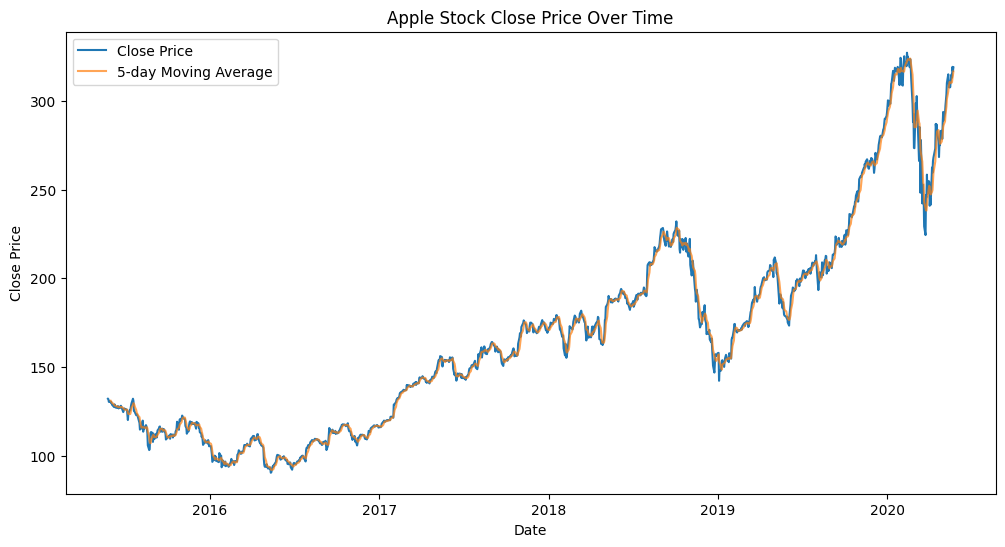

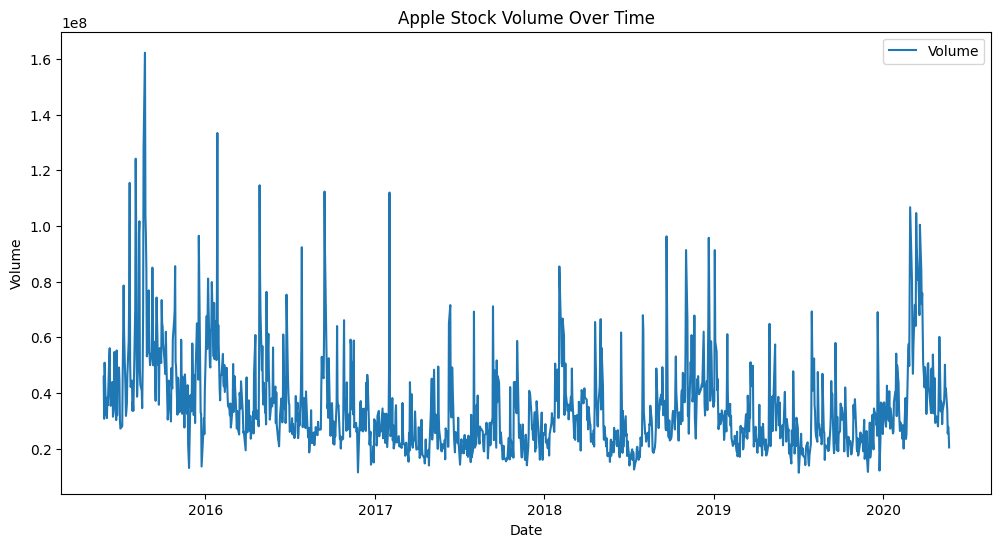

In [ ]:
import matplotlib.pyplot as plt

# Plotting the closing price
plt.figure(figsize=(12, 6))
plt.plot(df_aapl['close'], label='Close Price')
plt.plot(df_aapl['moving_avg_close'], label='5-day Moving Average', alpha=0.7)
plt.title('Apple Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Plotting the volume
plt.figure(figsize=(12, 6))
plt.plot(df_aapl['volume'], label='Volume')
plt.title('Apple Stock Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()


 Selecting Clustering Techniques for Time-Series Data
Given the characteristics of the time-series data, we will now select appropriate clustering techniques. For time-series data, clustering can be approached in two main ways:

Direct Clustering of Time-Series: Using algorithms specifically designed for time-series data, such as Time Series K-means or Dynamic Time Warping (DTW).
Feature-Based Clustering: Extracting features from the time series (like mean, variance, trends) and using traditional clustering algorithms (e.g., K-Means, Hierarchical).

Let's explore both approaches:

4.1 Direct Clustering of Time-Series
We can use the tslearn library, which provides time-series specific clustering algorithms.

In [ ]:
! pip install tslearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 369.8/369.8 kB 4.0 MB/s eta 0:00:00


In [ ]:
from tslearn.clustering import TimeSeriesKMeans

# Assume we're clustering based on the 'close' prices
# Reshape data for TimeSeriesKMeans
time_series = df_aapl['close'].values.reshape(-1, 1)

# Define the model
model = TimeSeriesKMeans(n_clusters=3, metric="euclidean", max_iter=10)

# Fit the model
clusters = model.fit_predict(time_series)

# Add cluster information to the DataFrame
df_aapl['Cluster'] = clusters


Extract features from the time series and use a traditional clustering algorithm.

Feature Extraction:

In [ ]:
# Adding more features for clustering
df_aapl['daily_return'] = df_aapl['close'].pct_change()
df_aapl['volatility'] = df_aapl['close'].rolling(window=5).std()

# Dropping NaN values that were created by feature engineering
df_aapl.dropna(inplace=True)

# Selecting features for clustering
features = df_aapl[['moving_avg_close', 'daily_return', 'volatility']]


Applying K-Means Clustering:

In [ ]:
from sklearn.cluster import KMeans

# K-Means clustering
kmeans = KMeans(n_clusters=3)
df_aapl['Cluster_FeatureBased'] = kmeans.fit_predict(features)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Analyzing and Interpreting Clusters

After applying the clustering techniques, it's important to analyze and interpret the resulting clusters to extract meaningful insights. This involves understanding what each cluster represents in the context of the time-series data.

Analyzing Clusters from Direct Time-Series Clustering
Cluster Profiles: Examine the average time-series patterns within each cluster. This can reveal common trends or behaviors among different segments.
Visualizing Clusters: Plot the time-series data for a few representatives from each cluster to visualize their patterns.


Cluster 0:
            close        high         low        open        volume  \
count  515.000000  515.000000  515.000000  515.000000  5.150000e+02   
mean   115.691175  116.584299  114.685403  115.600607  3.915879e+07   
std     15.276261   15.196119   15.287229   15.209408  1.966148e+07   
min     90.340000   91.670000   89.470000   90.000000  1.147592e+07   
25%    105.735000  106.490000  104.850000  105.620000  2.616421e+07   
50%    113.290000  114.240000  112.270000  113.160000  3.371041e+07   
75%    123.940000  125.070000  122.545000  124.165000  4.658959e+07   
max    153.310000  154.530000  149.950000  151.290000  1.622063e+08   

         adjClose     adjHigh      adjLow     adjOpen     adjVolume  \
count  515.000000  515.000000  515.000000  515.000000  5.150000e+02   
mean   108.769749  109.606409  107.825756  108.682815  3.915879e+07   
std     15.115937   15.031971   15.123153   15.039430  1.966148e+07   
min     84.954351   86.205062   84.136216   84.634620  1.147592e

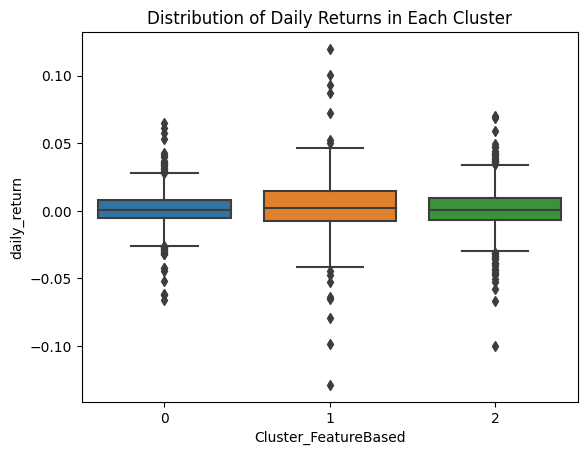

In [ ]:
import seaborn as sns

# Statistical summary of clusters
for i in range(kmeans.n_clusters):
    print(f"\nCluster {i}:")
    print(df_aapl[df_aapl['Cluster_FeatureBased'] == i].describe())

# Visualize the distribution of 'daily_return' for each cluster
sns.boxplot(x='Cluster_FeatureBased', y='daily_return', data=df_aapl)
plt.title('Distribution of Daily Returns in Each Cluster')
plt.show()
